In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
cwd = fr"C:\Users\juanb\Documents\BAVARIA\Data"

In [3]:
df_venta = pd.read_csv(fr"{cwd}\Input2_clientes_venta.csv", sep = ";")

In [4]:
df_venta["Fecha"] = pd.to_datetime(df_venta["Año"].astype(str) + df_venta["Mes"].map('{:02d}'.format), format="%Y%m")
df_venta

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Fecha
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,2019-05-01
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,2019-05-01
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,2019-05-01
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,2019-05-01
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,2020-08-01
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-07-01
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,2020-07-01
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-09-01


In [5]:
df_clientes = pd.read_csv(fr"{cwd}\Input1_clientes_estructura.csv", sep = ";")
df_clientes

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1
...,...,...,...,...,...,...
20916,20917,Regional 1,Gerencia_1,Subcanal_31,Categoria_2,0
20917,20918,Regional 1,Gerencia_4,Subcanal_31,Categoria_1,0
20918,20919,Regional 1,Gerencia_9,Subcanal_31,Categoria_1,0
20919,20920,Regional 1,Gerencia_10,Subcanal_31,Categoria_1,0


In [106]:
df_test = pd.read_csv(fr"{cwd}\Input3_clientes_test_5.csv", sep = ";")
df_test

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,0.390000,0.384761,0.528871,0.620000,0.610000
1,12,0.230000,0.843000,0.545422,0.120000,0.030000
2,14,0.680000,0.272290,0.553130,0.060000,0.060000
3,15,0.920000,0.337958,0.302522,0.300000,0.330000
4,18,0.480000,0.263524,0.303468,0.090000,0.180000
...,...,...,...,...,...,...
9297,20186,0.030000,0.149036,0.159453,0.630000,0.590000
9298,20261,0.170000,0.062074,0.046851,0.900000,0.900000
9299,20309,0.059163,0.073033,0.085601,0.489594,0.418825
9300,20360,0.120000,0.035598,0.065089,0.880000,0.980000


## Producto Inno 2

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score
import xgboost as xgb

In [107]:
df_prod_t = pd.read_pickle("df_prod_inno2_t.pkl")
df_prod_t = pd.get_dummies(df_prod_t)
df_prod_t

,disc_ProdOt31,Volumen_ProdOt68,Volumen_ProdOt7,disc_ProdOt39,nr_ProdInno2,nr_ProdOt19,nr_ProdOt78,disc_Prod1,disc_ProdOt22,nr_ProdOt40,...,Gerencia2_Gerencia_2,Gerencia2_Gerencia_3,Gerencia2_Gerencia_4,Gerencia2_Gerencia_5,Gerencia2_Gerencia_6,Gerencia2_Gerencia_7,Gerencia2_Gerencia_8,Gerencia2_Gerencia_9,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.021734,0.0,0.0,0.0,0.0,0.0,0.0,57.546765,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20917,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
20918,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,0
20919,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,1,1,0


In [108]:
df_prod = pd.read_pickle("df_prod_inno2.pkl")
df_prod

,ProdInno2,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,...,nr_ProdOt83,nr_ProdOt84,nr_ProdOt85,nr_ProdOt88,nr_ProdOt89,nr_ProdOt9,nr_ProdOt91,nr_ProdOt92,nr_ProdOt93,nr_ProdOt96
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,Gerencia_3,Subcanal_1,Categoria_2,1,0.0,0.0,0.000000,0.136927,0.019561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5843,0.0,Gerencia_1,Subcanal_3,Categoria_1,1,0.0,0.0,0.004676,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4539,0.0,Gerencia_10,Subcanal_3,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4536,0.0,Gerencia_10,Subcanal_3,Categoria_2,1,0.0,0.0,0.000000,0.078244,0.039122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11769,0.0,Gerencia_3,Subcanal_3,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,Gerencia_1,Subcanal_10,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19714,0.0,Gerencia_1,Subcanal_8,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19702,0.0,Gerencia_3,Subcanal_21,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
df_pd = pd.get_dummies(df_prod)
df_pd

,ProdInno2,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.000000,0.136927,0.019561,0.130933,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
5843,0.0,0.0,0.0,0.004676,0.000000,0.000000,0.000000,0.056694,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4539,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4536,0.0,0.0,0.0,0.000000,0.078244,0.039122,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
11769,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
19714,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
19702,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
df_c = df_pd[df_pd.index.isin(df_test["Cliente"])]
df_c

,ProdInno2,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.000000,0.0,0.000000,0.136927,0.019561,0.130933,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,0,1
4539,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,1,0
4546,0.0,0.000000,0.0,0.056114,0.019561,0.000000,0.467619,0.184255,0.0,0.086938,...,0,0,0,0,1,0,0,0,0,1
3092,0.0,0.033721,0.0,0.000000,0.000000,0.000000,0.000000,0.056694,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,1
4535,0.0,0.000000,0.0,0.000000,0.039122,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0
18878,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,1,0
18996,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1,0,0,0,1,0,0,0,1,0


In [58]:
df_true = df_pd[df_pd["ProdInno2"] == 1]
df_false = df_pd[df_pd["ProdInno2"] == 0]

In [59]:
df_false = df_false.sample(n=df_true.shape[0]*2)

In [60]:
df_resampled =df_true.append(df_false).sample(frac = 1) 
df_resampled

,ProdInno2,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
6606,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,0,1
18541,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0
6811,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0
14457,1.0,0.0,0.000000,0.087289,0.000000,0.000000,0.158990,0.047245,0.0,0.098529,...,0,0,0,0,0,1,0,0,0,1
7579,1.0,0.0,0.000000,0.065467,0.000000,0.000000,0.466840,0.014173,0.0,0.449178,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19526,1.0,0.0,0.000000,0.000000,0.097805,0.039122,0.000000,0.000000,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0
6026,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,0,1,0
15259,1.0,0.0,0.043469,0.018705,0.039122,0.019561,0.149638,0.049607,0.0,0.046367,...,1,0,0,0,0,1,0,0,0,1


In [61]:
X = df_resampled.drop(columns=["ProdInno2"])
Y = df_resampled[["ProdInno2"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Random Forest

In [62]:
clf = RandomForestClassifier()

In [63]:
clf.fit(X_train, y_train)

<ipython-input-63-4f66baab8f93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [64]:
clf.score(X_train, y_train)

0.9862189927336508

In [65]:
clf.score(X_test, y_test)

0.8056112224448898

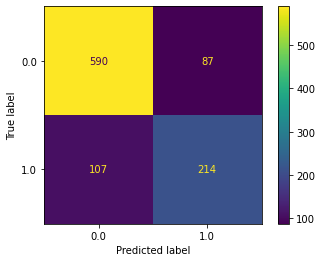

In [66]:
plot_confusion_matrix(clf, X_test, y_test)

In [67]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8607426018213025

In [103]:
#import pickle
#with open('modelInno2.pkl', 'wb') as f:
#    pickle.dump(clf, f)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [74]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished
E:\Users\juanb\anaconda3\envs\bavaria\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [75]:
import copy

In [93]:
clf

RandomForestClassifier()

In [92]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=800)

In [76]:
best_rf = copy.deepcopy(rf_random.best_estimator_)

In [77]:
best_rf.score(X_train, y_train)

0.9496366825357053

In [78]:
best_rf.score(X_test, y_test)

0.8216432865731463

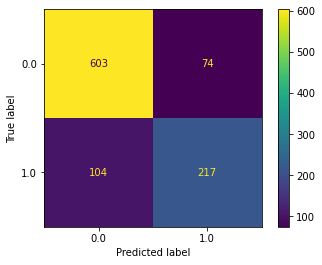

In [79]:
plot_confusion_matrix(best_rf, X_test, y_test)

In [80]:
roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

0.8696696530874254

0.8782937088940017

### SVMC

In [21]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))

In [22]:
clf2.fit(X_train, y_train)

E:\Users\juanb\anaconda3\envs\bavaria\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [23]:
clf2.score(X_test, y_test)

0.7607816711590296

In [24]:
clf2.score(X_train, y_train)

0.7969671440606572

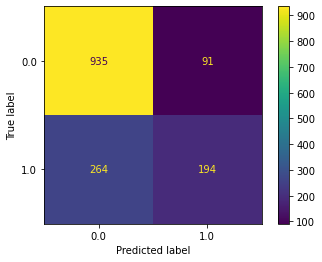

In [25]:
plot_confusion_matrix(clf2, X_test, y_test)

In [26]:
roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1])

0.8103596874281773

### XgBoost

In [27]:
param = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":2}
num_round = 100
train_mat = xgb.DMatrix(X_train, label=y_train)
test_mat = xgb.DMatrix(X_test, label=y_test)
all_mat = xgb.DMatrix(df_c.drop(columns=["ProdInno2"]), label=df_c[["ProdInno2"]])

evaluation = [(test_mat, "eval"), (train_mat, "train")]

In [28]:
bst = xgb.train(param, train_mat, num_round, evaluation)

[0]	eval-error:0.22978	train-error:0.23791
[1]	eval-error:0.22911	train-error:0.23791
[2]	eval-error:0.21968	train-error:0.23252
[3]	eval-error:0.20620	train-error:0.21887
[4]	eval-error:0.20350	train-error:0.20944
[5]	eval-error:0.19542	train-error:0.21466
[6]	eval-error:0.19205	train-error:0.20674
[7]	eval-error:0.18801	train-error:0.20438
[8]	eval-error:0.19340	train-error:0.20438
[9]	eval-error:0.18733	train-error:0.20101
[10]	eval-error:0.18464	train-error:0.20017
[11]	eval-error:0.18531	train-error:0.19916
[12]	eval-error:0.18261	train-error:0.19764
[13]	eval-error:0.18396	train-error:0.19697
[14]	eval-error:0.18531	train-error:0.19764
[15]	eval-error:0.18329	train-error:0.19528
[16]	eval-error:0.18329	train-error:0.19343
[17]	eval-error:0.18059	train-error:0.19242
[18]	eval-error:0.17924	train-error:0.19208
[19]	eval-error:0.17992	train-error:0.19056
[20]	eval-error:0.18127	train-error:0.19090
[21]	eval-error:0.18194	train-error:0.18955
[22]	eval-error:0.18329	train-error:0.1885

In [29]:
clf3 = xgb.XGBModel(**param)

In [30]:
clf3.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.60735	validation_1-logloss:0.60652
[1]	validation_0-logloss:0.56131	validation_1-logloss:0.55710
[2]	validation_0-logloss:0.53165	validation_1-logloss:0.52687
[3]	validation_0-logloss:0.51039	validation_1-logloss:0.50652
[4]	validation_0-logloss:0.49687	validation_1-logloss:0.49112
[5]	validation_0-logloss:0.48518	validation_1-logloss:0.47747
[6]	validation_0-logloss:0.47753	validation_1-logloss:0.47070
[7]	validation_0-logloss:0.47075	validation_1-logloss:0.46348
[8]	validation_0-logloss:0.46571	validation_1-logloss:0.45890
[9]	validation_0-logloss:0.46152	validation_1-logloss:0.45532
[10]	validation_0-logloss:0.45782	validation_1-logloss:0.45014
[11]	validation_0-logloss:0.45443	validation_1-logloss:0.44739
[12]	validation_0-logloss:0.45134	validation_1-logloss:0.44555
[13]	validation_0-logloss:0.44906	validation_1-logloss:0.44223
[14]	validation_0-logloss:0.44702	validation_1-logloss:0.43978
[15]	validation_0-logloss:0.44515	validation_1-logloss:0.43876
[1

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0, gpu_id=-1,
         interaction_constraints='', learning_rate=0.300000012,
         max_delta_step=0, max_depth=2, min_child_weight=1,
         monotone_constraints='()', n_jobs=2, nthread=2, num_parallel_tree=1,
         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
         scale_pos_weight=1, subsample=1, tree_method='exact',
         validate_parameters=1)

In [31]:
roc_auc_score(y_test, bst.predict(test_mat))

0.8609515054010572

In [32]:
roc_auc_score(y_test, clf3.predict(X_test))

0.8609515054010572

No Skill: ROC AUC=0.500
xgboost: ROC AUC=0.861
randomForest: ROC AUC=0.848


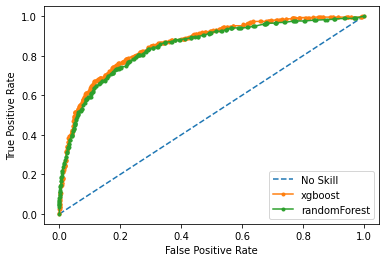

In [33]:
# roc curve and auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rf_probs = clf.predict_proba(X_test)[:, 1]
xg_probs = clf3.predict(X_test)
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xg_auc = roc_auc_score(y_test, xg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('xgboost: ROC AUC=%.3f' % (xg_auc))
print('randomForest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xg_fpr, xg_tpr, marker='.', label='xgboost')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='randomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [68]:
clf.fit(X, Y)

<ipython-input-68-bb7a7515ddfc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, Y)


RandomForestClassifier()

In [87]:
best_rf.fit(X, Y)

<ipython-input-87-18f6596e70c4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X, Y)


RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=800)

In [98]:
df_c["predicted"] = clf.predict_proba(df_c.drop(columns=["ProdInno2", "predicted"]))[:, 1]
df_c

<ipython-input-98-a6a087113aa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["predicted"] = clf.predict_proba(df_c.drop(columns=["ProdInno2", "predicted"]))[:, 1]


,ProdInno2,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1,predicted
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.000000,0.0,0.000000,0.136927,0.019561,0.130933,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,0.610000
4539,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,1,0,0.161098
4546,0.0,0.000000,0.0,0.056114,0.019561,0.000000,0.467619,0.184255,0.0,0.086938,...,0,0,0,1,0,0,0,0,1,0.460000
3092,0.0,0.033721,0.0,0.000000,0.000000,0.000000,0.000000,0.056694,0.0,0.000000,...,0,1,0,0,0,0,0,0,1,0.040000
4535,0.0,0.000000,0.0,0.000000,0.039122,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,0,1,0.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,0.000000
18878,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,1,0,0,0,0,1,0,0.168666
18996,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0,0,1,0,0,0,1,0,0.011333


In [99]:
df_a = df_test.copy().set_index("Cliente")
df_a["Marca_Inno2"] = df_c[["predicted"]]
df_a

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.293539,0.422045,0.528871,0.620000,0.610000
12,0.133522,0.750508,0.545422,0.120000,0.030000
14,0.679071,0.178546,0.553130,0.060000,0.060000
15,0.840432,0.178047,0.302522,0.300000,0.330000
18,0.833084,0.216901,0.303468,0.090000,0.180000
...,...,...,...,...,...
20186,0.083719,0.147069,0.159453,0.630000,0.590000
20261,0.178418,0.049379,0.046851,0.900000,0.900000
20309,0.159872,0.152190,0.085601,0.489594,0.418825


In [100]:
df_a.to_csv(fr"{cwd}\Input3_clientes_test.csv", sep = ";")

In [97]:
df_a.to_csv(fr"{cwd}\completo12.csv", sep = ",")

In [101]:
df_a

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.293539,0.422045,0.528871,0.620000,0.610000
12,0.133522,0.750508,0.545422,0.120000,0.030000
14,0.679071,0.178546,0.553130,0.060000,0.060000
15,0.840432,0.178047,0.302522,0.300000,0.330000
18,0.833084,0.216901,0.303468,0.090000,0.180000
...,...,...,...,...,...
20186,0.083719,0.147069,0.159453,0.630000,0.590000
20261,0.178418,0.049379,0.046851,0.900000,0.900000
20309,0.159872,0.152190,0.085601,0.489594,0.418825


In [102]:
df_a.to_csv(fr"{cwd}\Input3_clientes_test_3.csv", sep = ";")

In [104]:
clf.predict_proba(df_c.drop(columns=["ProdInno2", "predicted"]))[:, 1]

array([0.61      , 0.16109757, 0.46      , ..., 0.01133333, 0.32655952,
       0.        ])

In [110]:
df_prod_t
df_c2 = df_prod_t[df_prod_t.index.isin(df_test["Cliente"])].copy()

In [113]:
df_c2["predicted"] = clf.predict_proba(df_c2.loc[:, df_c.drop(columns=["ProdInno2", "predicted"]).columns])[:, 1]

In [114]:
df_b = df_test.copy().set_index("Cliente")
df_b["Marca_Inno2"] = df_c2[["predicted"]]
df_b

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.390000,0.384761,0.528871,0.620000,0.57
12,0.230000,0.843000,0.545422,0.120000,0.47
14,0.680000,0.272290,0.553130,0.060000,0.29
15,0.920000,0.337958,0.302522,0.300000,0.32
18,0.480000,0.263524,0.303468,0.090000,0.36
...,...,...,...,...,...
20186,0.030000,0.149036,0.159453,0.630000,0.80
20261,0.170000,0.062074,0.046851,0.900000,0.91
20309,0.059163,0.073033,0.085601,0.489594,0.64


In [115]:
df_b.to_csv(fr"{cwd}\completo28.csv", sep = ",")

In [105]:
a = list(zip(df_c.drop(columns=["ProdInno2", "predicted"]).columns, clf.feature_importances_))
a.sort(key=lambda x:x[1], reverse=True)
a

[('nr_ProdInno2', 0.10515772982636924),
 ('Volumen_ProdInno2', 0.09070354478588491),
 ('nr_ProdInno1', 0.05975014640844316),
 ('Volumen_ProdInno1', 0.05711143690501218),
 ('nr_ProdOt12', 0.01690157786085564),
 ('nr_Prod3', 0.016707285359139266),
 ('Volumen_ProdOt12', 0.013376369996803927),
 ('Volumen_Prod3', 0.012529194714302208),
 ('Gerencia2_Gerencia_10', 0.012501273507753147),
 ('nr_ProdOt9', 0.011808240096068795),
 ('nr_ProdOt10', 0.010653783718771834),
 ('nr_ProdOt17', 0.01056890043634179),
 ('nr_ProdOt6', 0.010532656498910574),
 ('Volumen_ProdOt9', 0.010318050983221699),
 ('Volumen_ProdOt17', 0.009985346872302028),
 ('nr_ProdOt7', 0.009867988123662096),
 ('Volumen_ProdOt1', 0.009724271814903289),
 ('Volumen_ProdOt6', 0.009619642185979414),
 ('nr_ProdOt1', 0.009298098191856136),
 ('Volumen_ProdOt4', 0.009051373978379986),
 ('nr_ProdOt29', 0.0089271430120227),
 ('nr_ProdOt4', 0.008694272912962469),
 ('nr_ProdOt39', 0.00859689687954562),
 ('Volumen_ProdOt7', 0.008534223351697895),
 